# The Tables have Turned

Pandas is an open-source Python library providing high-performance data manipulation and analysis tool using its powerful data structures. The name Pandas is derived from the term "panel data"—multi-dimensional data involving measurements over time (especially in statistics and econometrics). Using Pandas, we can accomplish 5 typical steps in the processing of data: loading, preparation, manipulation, modeling, and analysis.

In addition to this notebook, many other resources are available:


- [The docs](https://pandas.pydata.org/pandas-docs/stable/)
- [Official (10 min) tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [Pandas tutorial for data science](https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/)
- [Introduction to pandas](https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.html)
- [Examples cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)
- [Python Data Science Handbook & GitHub](https://github.com/jakevdp/PythonDataScienceHandbook)
- [PyVideo](https://pyvideo.org/search?q=pandas)
- [Reading a .csv file](https://honingds.com/blog/pandas-read_csv/)
- [Pivot tables](http://pbpython.com/pandas-pivot-table-explained.html)
- [Tricks](https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba)

Also see the "Pandas Cheat Sheet" in the Assets folder.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-structures" data-toc-modified-id="Data-structures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data structures</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Series</a></span><ul class="toc-item"><li><span><a href="#Indexing-a-Series" data-toc-modified-id="Indexing-a-Series-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Indexing a Series</a></span></li></ul></li><li><span><a href="#DataFrames" data-toc-modified-id="DataFrames-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DataFrames</a></span><ul class="toc-item"><li><span><a href="#Indexing-a-DataFrame" data-toc-modified-id="Indexing-a-DataFrame-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Indexing a DataFrame</a></span></li><li><span><a href="#Column-operations" data-toc-modified-id="Column-operations-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Column operations</a></span></li><li><span><a href="#Row-operations" data-toc-modified-id="Row-operations-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Row operations</a></span></li></ul></li><li><span><a href="#Panel-data" data-toc-modified-id="Panel-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Panel data</a></span></li></ul></li><li><span><a href="#IO-Tools" data-toc-modified-id="IO-Tools-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IO Tools</a></span><ul class="toc-item"><li><span><a href="#Excel-spreadsheets" data-toc-modified-id="Excel-spreadsheets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Excel spreadsheets</a></span></li><li><span><a href="#Column-calculations" data-toc-modified-id="Column-calculations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Column calculations</a></span></li><li><span><a href="#Smoothing-data" data-toc-modified-id="Smoothing-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Smoothing data</a></span></li><li><span><a href="#Data-type-issues" data-toc-modified-id="Data-type-issues-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data type issues</a></span></li></ul></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Built-in-plots" data-toc-modified-id="Built-in-plots-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Built-in plots</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Data structures

Pandas works with the following 3 data structures (built on top of the NumPy array):
- Series (1D)
- DataFrame (2D)
- Multi-level DataFrames (3D)

All Pandas data structures are value mutable (changeable) and, excluding Series, all are size mutable. 

### Series

A series can be thought of as a single column of data in a table. Homogenous data can be structured with `pd.Series(data, index, dtype, copy)`. A series can be created from the built-in data sequences, ndarrays, or even scalars.

In [2]:
data = np.array(['a','b','c','d']) # the data is an array of strings
pd.Series(data)

0    a
1    b
2    c
3    d
dtype: object

The keyword arguments for `pd.Series` include `index` and `dtype` which allows you to specify custom index values and the data type, respectively. 

The data types (dtypes) are listed [here](https://docs.scipy.org/doc/numpy-1.10.4/user/basics.types.html). 
Some examples include:

|dtype      |Description         |
| ---       | --- |
| int8	    | Byte (-128 to 127)|
| int32	    | Integer (-2147483648 to 2147483647)|
| float32	| Single precision float (sign bit, 8 bits exponent, 23 bits mantissa)|
| complex64	| Complex number (two 32-bit floats which are the real and imaginary components)|

In [3]:
# pd.Series?

In comparison to the NumPy array, the pandas Series has an explicitly defined index associated with the values, which needn't be in order.

In [4]:
# the data is a list of floats
data = [6.0, 7.0, 8.0, 9.0]                                   
s = pd.Series(data, index=[100, 101, 200, 201], dtype='int8') # change the data to integers
print(s)
print('')
print(s.axes) # returns a list of the row axis labels 

100    6
101    7
200    8
201    9
dtype: int8

[Int64Index([100, 101, 200, 201], dtype='int64')]


In [5]:
# the data is a dictionary
data = {'a': 20, 'b': 40, 'c': 60} 
pd.Series(data)

a    20
b    40
c    60
dtype: int64

Note: index order is persisted and the missing element is filled with NaN (Not a Number).

In [6]:
data = {'a': 0., 'b': 1., 'c': 2.}
s = pd.Series(data, index=['b', 'c', 'd', 'a'])
print(s)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


#### Indexing a Series

Both the explicitly defined (label-based) and implicitly defined (integer-based) indices can be used for indexing and slicing a Series. 

<span style="color:red"> **Warning:** </span> When slicing with a label-based index (*i.e.*, `s['a':'c']`), the final index is included in the slice, while when slicing with integers (*i.e.*, `s[0:2]`), the final index is excluded from the slice.

In [7]:
data = [6, 7, 8, 9]                                   
s = pd.Series(data, index=['a', 'b', 'c', 'd'])
print(s['b'], 'is the same as', s[1])

7 is the same as 7


In [8]:
s['a':'c']

a    6
b    7
c    8
dtype: int64

In [9]:
s[0:2]

a    6
b    7
dtype: int64

These slicing and indexing conventions can be a source of confusion. For example, if your Series has a label-based integer index, a "normal" indexing operation will use the **label-based indices**, while a slicing operation will use the **implicit indeces**.

In [10]:
s = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
s[1]

'a'

In [11]:
s[1:3]

3    b
5    c
dtype: object

Therefore, it is recommended to use the specific *indexer* attribute required:

- `loc`: explicit/label-based index (contrary to usual python slices, **both** the start and the stop are included)
- `iloc`: implicit/integer index

(Note that the `ix` indexer has been deprecated)

In [12]:
s = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
s.loc[1:3]

1    a
3    b
dtype: object

In [13]:
s.iloc[1:3]

3    b
5    c
dtype: object

### DataFrames

DataFrames (tables) can be created with `pd.DataFrame(data, index, columns, dtype, copy)`, where the data can be built-in data sequences, ndarrays, Series or another DataFrame. Note, using `print()` will disable the pretty rendering.

In [14]:
# pd.DataFrame?

In [15]:
# nested lists for rows
data = [['Alex', 10.0], 
        ['Bob', 12.0], 
        ['Clark', 13.0]]
df = pd.DataFrame(data, columns=['Name', 'Age'], dtype='int64')
df

,Name,Age
0,Alex,10
1,Bob,12
2,Clark,13


In [16]:
# dictionary keys become the headings and the values are the data points
data = {'Name':['Tom', 'Jack', 'Steve'], 'Age':[28, 34, 29]}
df = pd.DataFrame(data)
df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29


#### Indexing a DataFrame

Columns can be accessed *via* dictionary-style indexing or attribute-style access. 

<span style="color:red"> **Warning:** </span> The attribute-style referencing won't work if column names are not strings, have spaces, or conflict with methods of the DataFrame.

In [17]:
df['Name']

0      Tom
1     Jack
2    Steve
Name: Name, dtype: object

In [18]:
df.Name

0      Tom
1     Jack
2    Steve
Name: Name, dtype: object

Using the `values` attribute gives a single indexable array of the DataFrame.

In [19]:
df.values

array([['Tom', 28],
       ['Jack', 34],
       ['Steve', 29]], dtype=object)

In [20]:
df.values[0][1]

28

In [21]:
# display values greater than or equal to 30
df[df >= 30]

,Name,Age
0,Tom,NaN
1,Jack,34.0
2,Steve,NaN


Using the `loc` indexer we can index the underlying data in an array-like style but using the explicit index and column names. Using the `iloc` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the DataFrame index and column labels are maintained in the result:

In [22]:
df = pd.DataFrame(data, index=['Overseer', 'Supervisor', 'Coordinator'])
df

,Name,Age
Overseer,Tom,28
Supervisor,Jack,34
Coordinator,Steve,29


In [23]:
df.loc['Overseer':'Supervisor', 'Age']

Overseer      28
Supervisor    34
Name: Age, dtype: int64

In [24]:
df.iloc[0:2, 1:2]

,Age
Overseer,28
Supervisor,34


#### Column operations

Columns can be appended, added together, or deleted. 

In [25]:
# Series for columns
d = {'col1': pd.Series([3, 6, 9], index=['ra', 'rb', 'rc']),
     'col2': pd.Series([2, 4, 6, 8], index=['ra', 'rb', 'rc', 'rd'])}

df = pd.DataFrame(d)

# append a 3rd column
df['col3'] = pd.Series([10, 20, 30], index=['ra','rb','rc'])
df

,col1,col2,col3
ra,3.0,2,10.0
rb,6.0,4,20.0
rc,9.0,6,30.0
rd,NaN,8,NaN


In [26]:
# add column 1 & 3 together
df['col4'] = df['col1'] + df['col3']
print(df)
print("")

# delete column 1
df.pop('col1') # or, del df['col1']
print(df)

    col1  col2  col3  col4
ra   3.0     2  10.0  13.0
rb   6.0     4  20.0  26.0
rc   9.0     6  30.0  39.0
rd   NaN     8   NaN   NaN

    col2  col3  col4
ra     2  10.0  13.0
rb     4  20.0  26.0
rc     6  30.0  39.0
rd     8   NaN   NaN


#### Row operations

Row addition and deletion is also possible. Iteratively appending rows to a DataFrame is more computationally intensive than a single concatenate. Thus it is recommended to append those rows to a list and then **concatenate** the list with the original DataFrame all at once.

In [27]:
d = {'col1': pd.Series([3, 6, 9], index=['ra', 'rb', 'rc']),
     'col2': pd.Series([10, 20, 30], index=['ra', 'rb', 'rc'])}

df = pd.DataFrame(d)

# Add row rd and re
df2 = pd.DataFrame([[12, 40]], index = ['rd'], columns=['col1', 'col2'])
df3 = pd.DataFrame([[15, 50]], index = ['re'], columns=['col1', 'col2'])
df = df.append(df2)
df = pd.concat([df, df3])

# Delete row rc
df = df.drop('rc')
df

,col1,col2
ra,3,10
rb,6,20
rd,12,40
re,15,50


In [28]:
# add row re to row ra
df.loc['ra'] += df.loc['re']
df

,col1,col2
ra,18,60
rb,6,20
rd,12,40
re,15,50


Indices are aligned when performing operations on DataFrames. The following table lists Python operators and their equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |

In [29]:
df.add(df2)

,col1,col2
ra,NaN,NaN
rb,NaN,NaN
rd,24.0,80.0
re,NaN,NaN


In [30]:
df.add(df2, fill_value=0)

,col1,col2
ra,18.0,60.0
rb,6.0,20.0
rd,24.0,80.0
re,15.0,50.0


### Panel data

The official panel data type is being removed. Thus rather use the `MultiIndex` type within the DataFrame function.

In [31]:
data = np.array([[1, 2, 3, 4, 5],
                 [6, 7, 8, 9, 0],
                 [2, 4, 6, 8, 0],
                 [1, 3, 5, 7, 9],
                 [1, 1, 1, 1, 1],
                 [8, 4, 7, 8, 6]])

df = pd.DataFrame(data = data,
    index = pd.MultiIndex.from_product([[2017, 2018, 2019], ['US', 'UK']]),
    columns = ['col {}'.format(i) for i in range(1, 6)])
df

col 1  col 2  col 3  col 4  col 5
2017 US      1      2      3      4      5
     UK      6      7      8      9      0
2018 US      2      4      6      8      0
     UK      1      3      5      7      9
2019 US      1      1      1      1      1
     UK      8      4      7      8      6

In [32]:
df.iloc[2:4, -1]

2018  US    0
      UK    9
Name: col 5, dtype: int32

## IO Tools

The Pandas Input/Output API supports _reading from_ and _writing to_ [several different file formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) such as the following:

| Data Description | Reader         | Writer       |
|------------------|----------------|--------------|
| CSV              | read_csv       | to_csv       |
| JSON             | read_json      | to_json      |
| HTML             | read_html      | to_html      |
| Local clipboard  | read_clipboard | to_clipboard |
| MS Excel         | read_excel     | to_excel     |


Try highlighting the aforementioned table and press copy (or Ctrl+C), then run this cell: 

In [33]:
# pd.read_clipboard()

### Excel spreadsheets

MS Excel is commonly used for data analysis. In a spreadsheet the emphasis is on the data, with the formulae remaining in the background, whereas in Python it's the other way around. It is good practice to separate your raw data from your calculations so that you don't accidentally overwrite it. 

Spreadsheets can be imported by pandas using the filename. If no `sheet_name` is specified, all sheets will be imported. To skip the first row after the heading, use `skiprows=[1]` as a keyword argument; however, this should not be necessary for tidy data.

For illustrative purposes, the attached data files under Assets will be used. "Experimental data.xlsx" represents material tests performed on biopolymer (zein) films. The first sheet contains a description of the data and the units, with the following sheets containing data in dedicated tables with **one observation per row**. XRD

In [34]:
# pd.read_excel?

In [35]:
df_perm = pd.read_excel('Assets/Experimental data.xlsx', sheet_name='Permeability')

### Column calculations

The first sheet shows the cummlative mass loss of diffusion cells containing one of 3 types of films wedged over an essential oil. We can create individual objects for each of these columns. Use the `head()` attribute to display the first 5 data points in a dataset. 

In [36]:
time = df_perm['t_cum']
ctrl = df_perm['Control']
A1 = df_perm['A1']
A2 = df_perm['A2']
A3 = df_perm['A3']

time.head()

0      0.00
1     42.25
2     66.25
3     93.00
4    115.00
Name: t_cum, dtype: float64

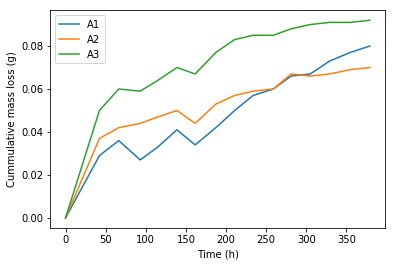

In [37]:
plt.figure()
plt.plot(time, A1, label='A1')
plt.plot(time, A2, label='A2')
plt.plot(time, A3, label='A3')
plt.ylabel('Cummulative mass loss (g)')
plt.xlabel('Time (h)')
plt.legend()
plt.show()

Notice how the mass loss doesn't increase linearly. We can calculate:
- the percent change between successive data points,
- rank them in ascending order,
- and find the correlation of the variables with respect to each other.

In [38]:
df_perm.pct_change().head()

,t_cum,Control,A1,A2,A3
0,NaN,NaN,NaN,NaN,NaN
1,inf,inf,inf,inf,inf
2,0.568047,0.642741,0.241379,0.135135,0.200000
3,0.403774,0.397219,-0.250000,0.047619,-0.016667
4,0.236559,0.282871,0.222222,0.068182,0.084746


In [39]:
df_perm.rank().head(n=6)

,t_cum,Control,A1,A2,A3
0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,3.0,2.0,2.0
2,3.0,3.0,6.0,3.0,4.0
3,4.0,4.0,2.0,4.5,3.0
4,5.0,5.0,4.0,6.0,5.0
5,6.0,6.0,7.0,7.0,7.0


In [40]:
df_perm.corr()

,t_cum,Control,A1,A2,A3
t_cum,1.000000,0.999794,0.966017,0.889175,0.864296
Control,0.999794,1.000000,0.964609,0.882163,0.856426
A1,0.966017,0.964609,1.000000,0.944908,0.917577
A2,0.889175,0.882163,0.944908,1.000000,0.990841
A3,0.864296,0.856426,0.917577,0.990841,1.000000


From the correlation matrix it is clear that film A3 had the least correlation with both time and the controlled experiment.

We can also perform array-like calculations on the columns (_broadcasting_). For instance, let's express the time in days and the mass loss as a percentage (all cells had 30 g of oil initially). We simply divide the time column by 24 and the mass loss columns (A1 to A3) by 30. 

<span style="color:red"> **Warning:** </span> If you're looping over columns, you're probably making more work for yourself than necessary.

In [41]:
time_d = time/24

film_perm = df_perm.loc[0::1, 'A1':'A3']
film_perm = film_perm/30*100

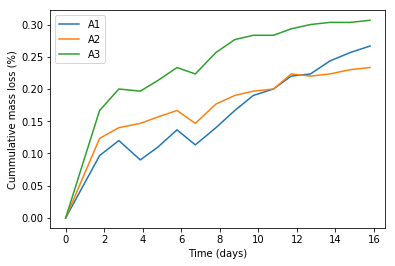

In [42]:
plt.figure()
plt.plot(time_d, film_perm)
plt.ylabel('Cummulative mass loss (%)')
plt.xlabel('Time (days)')
plt.legend(['A1', 'A2', 'A3'])
plt.show()

### Smoothing data

Sometimes noisy ("spiky") data are encountered, especially in timeseries. You can use moving/rolling average smoothing to see the trend better. The `rolling()` function will group observations into a window, and the `mean` method will calculate the average over a window, and place that as the new data point in the center spot (if `center=True`). Note this means that a (window - 1) number of datapoints will be lost on the sides of the plot and peaks may be flattened. 

Let's try it out on the X-ray diffraction (XRD) data. A window of 200 gives satisfactory smoothing. The first point in the smoothed data set is used to normalise the data.

In [43]:
import os
filelist = os.listdir('Assets/XRD-data')
filelist

['Zein_XRD-1A.xlsx', 'Zein_XRD-1B.xlsx']

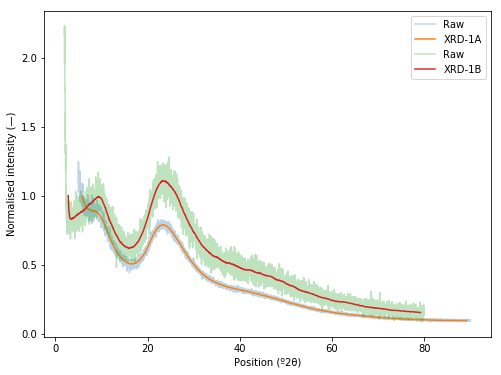

In [45]:
plt.figure(figsize=(8,6))
for file in filelist:
    df = pd.read_excel('Assets/XRD-data/'+file, header=None)
    df.columns = ["wavelength", "intensity"]
    wl = df['wavelength']
    it = df['intensity']
    
    it_smooth = it.rolling(window=200, center=True).mean()
    df['smooth'] = it_smooth
    factor = int(it_smooth.dropna().head(n=1))

    plt.plot(wl, it/factor, label='Raw', alpha=0.3)
    plt.plot(wl, it_smooth/factor, label='{}'.format(file[5:11]))
plt.xlabel('Position (º2θ)')
plt.ylabel('Normalised intensity (—)')
plt.legend()
plt.show()

### Data type issues

Unfortunately, blindly doing operations on data without converting to the correct `dtype` will result in errors, as illustrated [here](https://pbpython.com/pandas_dtypes.html).

In particular ensure that:

- integers aren't stored as floats
- values stored with units (e.g. prices or salaries) aren't stored as text
- dates must be `datetime64`
- binary values (yes or no) must be boolean

You can check the `dtypes` using `df.info()` and convert them using the `df.astype()` attribute.



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9750 entries, 0 to 9749
Data columns (total 3 columns):
wavelength    9750 non-null float64
intensity     9750 non-null float64
smooth        9551 non-null float64
dtypes: float64(3)
memory usage: 228.6 KB


## Statistics

### Descriptive statistics

A summary of statistics can be displayed for an entire DataFrame. Firstly, let's use the following data and organise it to see the trend better. 

In [47]:
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Johan','Jack',
   'Lee','David','Helen','Brandon','Brandon']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,46,51]),
   'Score':pd.Series([2.23,3.24,3.98,4.56,3.20,4.6,3.8,3.78,3.98,4.80,4.10,3.65])}

# Create a DataFrame
df = pd.DataFrame(d)
df.sort_values(by=['Age', 'Score'])

,Name,Age,Score
6,Jack,23,3.80
3,Vin,23,4.56
0,Tom,25,2.23
2,Ricky,25,3.98
1,James,26,3.24
5,Johan,29,4.60
4,Steve,30,3.20
9,Helen,30,4.80
7,Lee,34,3.78
8,David,40,3.98


The `df.describe()` attribute gives more statistical information. For numerical data the number of data points (count) and quartile values are shown. When including textual data in the description, repeated strings are regarded as "non-unique", with the most frequent string displayed.

In [48]:
# By default only analyses numeric columns
df.describe(include='all')

,Name,Age,Score
count,12,12.000000,12.000000
unique,11,NaN,NaN
top,Brandon,NaN,NaN
freq,2,NaN,NaN
mean,NaN,31.833333,3.826667
std,NaN,9.232682,0.708729
min,NaN,23.000000,2.230000
25%,NaN,25.000000,3.547500
50%,NaN,29.500000,3.890000
75%,NaN,35.500000,4.215000


You can also obtain the sum and mode of columns.

In [49]:
print(df.sum())

Name     TomJamesRickyVinSteveJohanJackLeeDavidHelenBra...
Age                                                    382
Score                                                45.92
dtype: object


In [50]:
print(df.cumsum())

                                                 Name  Age  Score
0                                                 Tom   25   2.23
1                                            TomJames   51   5.47
2                                       TomJamesRicky   76   9.45
3                                    TomJamesRickyVin   99  14.01
4                               TomJamesRickyVinSteve  129  17.21
5                          TomJamesRickyVinSteveJohan  158  21.81
6                      TomJamesRickyVinSteveJohanJack  181  25.61
7                   TomJamesRickyVinSteveJohanJackLee  215  29.39
8              TomJamesRickyVinSteveJohanJackLeeDavid  255  33.37
9         TomJamesRickyVinSteveJohanJackLeeDavidHelen  285  38.17
10  TomJamesRickyVinSteveJohanJackLeeDavidHelenBra...  331  42.27
11  TomJamesRickyVinSteveJohanJackLeeDavidHelenBra...  382  45.92


In [51]:
print(df.mode())
print("")
print(df.loc[:,"Age"].mode())

      Name  Age  Score
0  Brandon   23   3.98
1      NaN   25    NaN
2      NaN   30    NaN

0    23
1    25
2    30
dtype: int64


### Built-in plots

For quick visualisation, the built-in Pandas plotting attributes can be used.

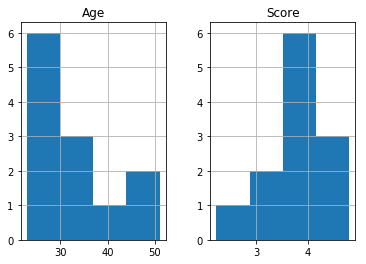

In [52]:
hist = df.hist(bins=4)